In [2]:
!pip install numpy-financial


In [3]:
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt

    Mês  Receita  Custo Total  Parcela Financiamento  Parcela Leasing  \
0     1  2800000    2580000.0          241010.325213     44424.394339   
1     2  2800000    2580000.0          241010.325213     44424.394339   
2     3  2800000    2580000.0          241010.325213     44424.394339   
3     4  2800000    2580000.0          241010.325213     44424.394339   
4     5  2800000    2580000.0          241010.325213     44424.394339   
5     6  2800000    2580000.0          241010.325213     44424.394339   
6     7  2800000    2580000.0          241010.325213     44424.394339   
7     8  2800000    2580000.0          241010.325213     44424.394339   
8     9  2800000    2580000.0          241010.325213     44424.394339   
9    10  2800000    2580000.0          241010.325213     44424.394339   
10   11  2800000    2580000.0          241010.325213     44424.394339   
11   12  2800000    2580000.0          241010.325213     44424.394339   
12   13  2800000    2580000.0          241010.32521

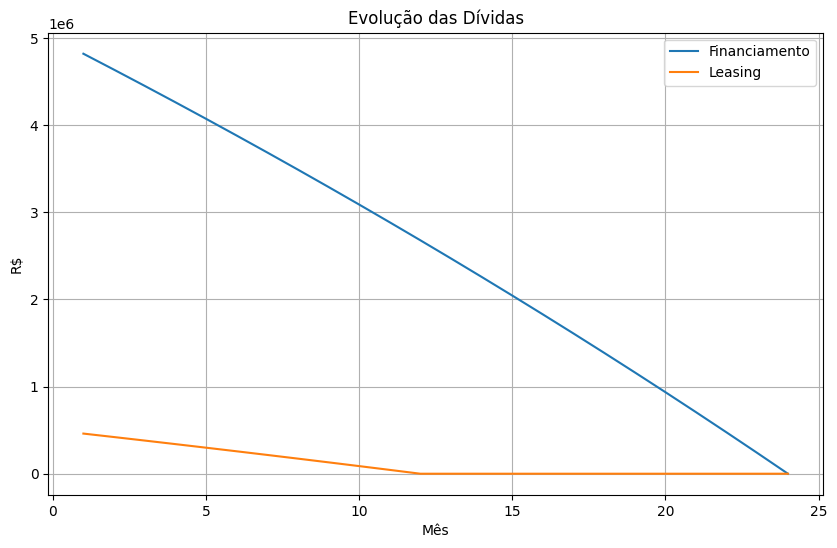

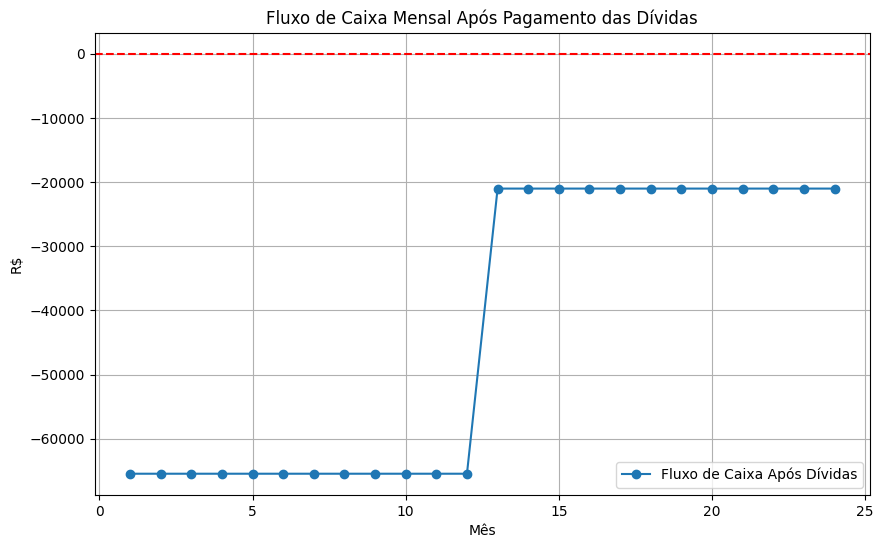

In [4]:
# -------------------------------
# Dados do financiamento principal
# -------------------------------
financiamento_valor = 5_000_000
taxa_financiamento = 0.012  # 1.2% ao mês
periodo_financiamento = 24  # 24 meses

# -------------------------------
# Dados do leasing
# -------------------------------
leasing_valor = 500_000
taxa_leasing = 0.01  # 1% ao mês
periodo_leasing = 12  # 12 meses

# -------------------------------
# Dados operacionais
# -------------------------------
receita_mensal = 2_800_000
custo_fixo = 1_600_000
percentual_custo_variavel = 0.35

# -------------------------------
# Calcular parcelas
# -------------------------------
parcela_financiamento = abs(npf.pmt(rate=taxa_financiamento, nper=periodo_financiamento, pv=-financiamento_valor))
parcela_leasing = abs(npf.pmt(rate=taxa_leasing, nper=periodo_leasing, pv=-leasing_valor))

# -------------------------------
# Simular 24 meses
# -------------------------------
meses = list(range(1, 25))
dados = []

saldo_devedor_fin = financiamento_valor
saldo_devedor_leasing = leasing_valor

for mes in meses:
    # Custos variáveis
    custo_variavel = receita_mensal * percentual_custo_variavel
    custo_total = custo_fixo + custo_variavel

    # Juros e amortização financiamento
    juros_fin = saldo_devedor_fin * taxa_financiamento
    amort_fin = parcela_financiamento - juros_fin
    saldo_devedor_fin = max(0, saldo_devedor_fin - amort_fin)

    # Juros e amortização leasing
    if mes <= periodo_leasing:
        juros_leasing = saldo_devedor_leasing * taxa_leasing
        amort_leasing = parcela_leasing - juros_leasing
        saldo_devedor_leasing = max(0, saldo_devedor_leasing - amort_leasing)
    else:
        parcela_leasing = juros_leasing = amort_leasing = 0

    # Resultado operacional
    fluxo_operacional = receita_mensal - custo_total
    fluxo_financeiro = fluxo_operacional - parcela_financiamento - parcela_leasing
    saldo_caixa = fluxo_financeiro

    dados.append([
        mes, receita_mensal, custo_total,
        parcela_financiamento, parcela_leasing,
        fluxo_operacional, fluxo_financeiro,
        saldo_devedor_fin, saldo_devedor_leasing
    ])

# -------------------------------
# Gerar DataFrame
# -------------------------------
df = pd.DataFrame(dados, columns=[
    "Mês", "Receita", "Custo Total",
    "Parcela Financiamento", "Parcela Leasing",
    "Fluxo Operacional", "Fluxo após Dívidas",
    "Saldo Devedor Financiamento", "Saldo Devedor Leasing"
])

print(df)

# -------------------------------
# Gráfico do saldo devedor
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(df["Mês"], df["Saldo Devedor Financiamento"], label="Financiamento")
plt.plot(df["Mês"], df["Saldo Devedor Leasing"], label="Leasing")
plt.title('Evolução das Dívidas')
plt.xlabel('Mês')
plt.ylabel('R$')
plt.legend()
plt.grid()
plt.show()

# -------------------------------
# Gráfico do fluxo de caixa
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(df["Mês"], df["Fluxo após Dívidas"], label="Fluxo de Caixa Após Dívidas", marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Fluxo de Caixa Mensal Após Pagamento das Dívidas')
plt.xlabel('Mês')
plt.ylabel('R$')
plt.grid()
plt.legend()
plt.show()

In [ ]:
%pip install numpy-financial

The previous error, `ModuleNotFoundError: No module named 'numpy_financial'`, occurred because the `numpy_financial` library was not installed in your environment. The cell above installs this library using `pip`, which is the standard package installer for Python. After this cell runs successfully, the original code cell should be able to import `numpy_financial` without error.